# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | dese
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | tayaman
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | el granada
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | ghat
Processing Record 15 of Set 1 | ascension
Processing Record 16 of Set 1 | olyokminsk
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | kudahuvadhoo
Processing Record 20 of Set 1 | gebeit
Processing Record 21 of Set 1 | oyama
Processing Record 22 of Set 1 | petropavlovsk-kamchatsky
Processing

Processing Record 38 of Set 4 | dudinka
Processing Record 39 of Set 4 | mejit
Processing Record 40 of Set 4 | longyearbyen
Processing Record 41 of Set 4 | aykhal
Processing Record 42 of Set 4 | vikhorevka
Processing Record 43 of Set 4 | bambari
Processing Record 44 of Set 4 | antigonish
Processing Record 45 of Set 4 | mikuni
Processing Record 46 of Set 4 | qaqortoq
Processing Record 47 of Set 4 | caleta de carquin
Processing Record 48 of Set 4 | eyl
Processing Record 49 of Set 4 | mushie
Processing Record 0 of Set 5 | ocean shores
Processing Record 1 of Set 5 | banikoara
Processing Record 2 of Set 5 | rezh
Processing Record 3 of Set 5 | smithers
Processing Record 4 of Set 5 | nar'yan-mar
Processing Record 5 of Set 5 | remire-montjoly
Processing Record 6 of Set 5 | ozark
Processing Record 7 of Set 5 | fort stockton
Processing Record 8 of Set 5 | acarau
Processing Record 9 of Set 5 | taoudenni
Processing Record 10 of Set 5 | nabire
Processing Record 11 of Set 5 | hinton
Processing Record

City not found. Skipping...
Processing Record 29 of Set 8 | mastic beach
Processing Record 30 of Set 8 | skowhegan
Processing Record 31 of Set 8 | beau vallon
Processing Record 32 of Set 8 | terrace
Processing Record 33 of Set 8 | bathsheba
Processing Record 34 of Set 8 | kendari
Processing Record 35 of Set 8 | medina
Processing Record 36 of Set 8 | polski trambesh
Processing Record 37 of Set 8 | lautoka
Processing Record 38 of Set 8 | tobelo
Processing Record 39 of Set 8 | mount gambier
Processing Record 40 of Set 8 | as sulaymaniyah
Processing Record 41 of Set 8 | isangel
Processing Record 42 of Set 8 | verkhnevilyuysk
Processing Record 43 of Set 8 | kargasok
Processing Record 44 of Set 8 | arkhangel'sk
Processing Record 45 of Set 8 | cam ranh
Processing Record 46 of Set 8 | laojunmiao
Processing Record 47 of Set 8 | olgii
City not found. Skipping...
Processing Record 48 of Set 8 | souillac
Processing Record 49 of Set 8 | qacha's nek
Processing Record 0 of Set 9 | san andres
Processi

City not found. Skipping...
Processing Record 19 of Set 12 | laracha
Processing Record 20 of Set 12 | nkurenkuru
City not found. Skipping...
Processing Record 21 of Set 12 | farafangana
Processing Record 22 of Set 12 | ocean pointe
City not found. Skipping...
Processing Record 23 of Set 12 | mohr
Processing Record 24 of Set 12 | raja
Processing Record 25 of Set 12 | tchintabaraden
Processing Record 26 of Set 12 | mantua
Processing Record 27 of Set 12 | santyoku
Processing Record 28 of Set 12 | pangai
Processing Record 29 of Set 12 | nadvoitsy
Processing Record 30 of Set 12 | abu zabad
Processing Record 31 of Set 12 | sabzevar
Processing Record 32 of Set 12 | labrador city
Processing Record 33 of Set 12 | berbera
Processing Record 34 of Set 12 | opuwo
Processing Record 35 of Set 12 | duba
Processing Record 36 of Set 12 | terbanggi besar
Processing Record 37 of Set 12 | bam
Processing Record 38 of Set 12 | sitka
Processing Record 39 of Set 12 | yebaishou
-----------------------------
Dat

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,15.89,80,78,9.63,ZA,1697304612
1,isafjordur,66.0755,-23.1240,0.02,74,100,1.03,IS,1697304565
2,dese,11.1333,39.6333,13.96,72,89,0.11,ET,1697304970
3,whitehorse,60.7161,-135.0538,5.01,86,75,5.66,CA,1697304561
4,stanley,54.8680,-1.6985,6.77,72,20,5.14,GB,1697304816


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,15.89,80,78,9.63,ZA,1697304612
1,isafjordur,66.0755,-23.1240,0.02,74,100,1.03,IS,1697304565
2,dese,11.1333,39.6333,13.96,72,89,0.11,ET,1697304970
3,whitehorse,60.7161,-135.0538,5.01,86,75,5.66,CA,1697304561
4,stanley,54.8680,-1.6985,6.77,72,20,5.14,GB,1697304816


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

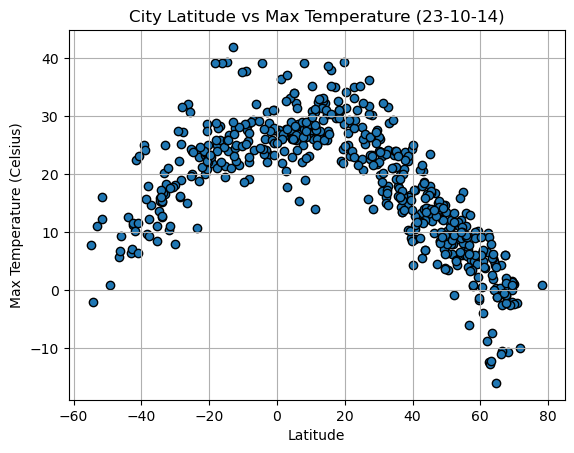

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], linewidths=1, marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (23-10-14)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

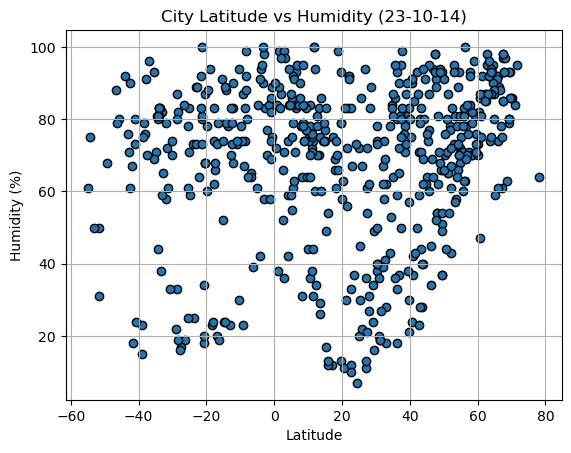

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], linewidths=1, marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (23-10-14)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

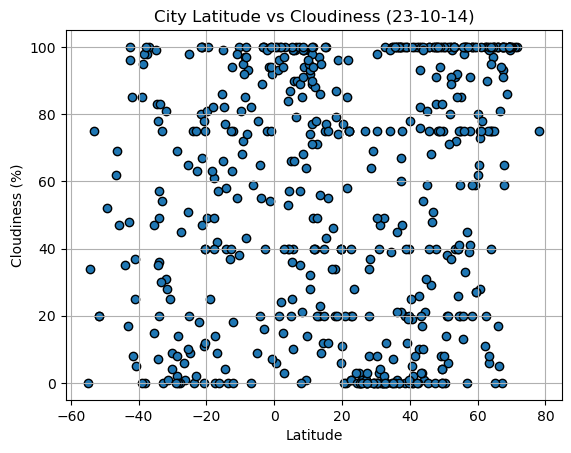

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], linewidths=1, marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (23-10-14)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

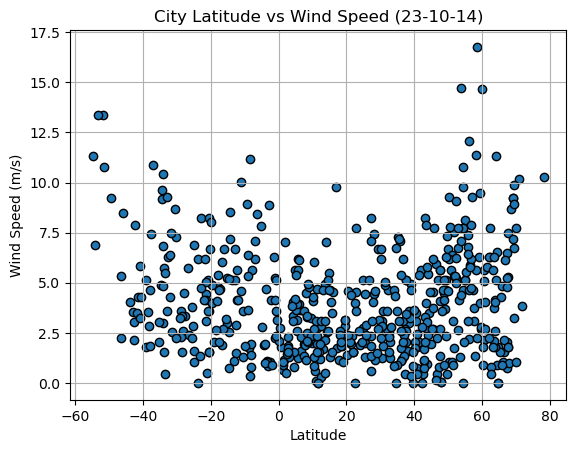

In [35]:
# Build the scatter plots for latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], linewidths=1, marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (23-10-14)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def lin_regress_function(x_values, y_values, coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot (x_values, regress_values, "r-")
    plt.annotate(line_eq, coordinates , fontsize=15,color="red")


    # Print r square value
    print(f"R squared: {rvalue**2}")

    # Show plot
    plt.show()
    
    

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,isafjordur,66.0755,-23.1240,0.02,74,100,1.03,IS,1697304565
2,dese,11.1333,39.6333,13.96,72,89,0.11,ET,1697304970
3,whitehorse,60.7161,-135.0538,5.01,86,75,5.66,CA,1697304561
4,stanley,54.8680,-1.6985,6.77,72,20,5.14,GB,1697304816
5,tayaman,13.2295,120.5726,26.18,83,97,1.70,PH,1697304971


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,15.89,80,78,9.63,ZA,1697304612
10,grytviken,-54.2811,-36.5092,-2.11,75,34,6.87,GS,1697304972
12,ushuaia,-54.8000,-68.3000,7.81,61,0,11.32,AR,1697304709
16,port-aux-francais,-49.3500,70.2167,0.90,68,52,9.22,TF,1697304974
17,east london,-33.0153,27.9116,16.52,82,75,3.60,ZA,1697304609


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7771368077661442


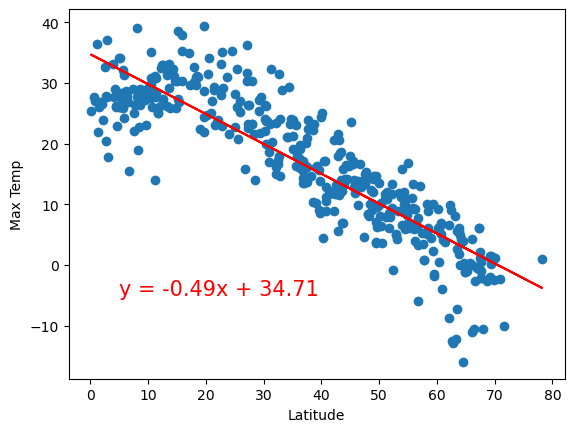

In [39]:
# Linear regression on Northern Hemisphere
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
lin_regress_function(x_values, y_values, (5, -5))

R squared: 0.5417422060619542


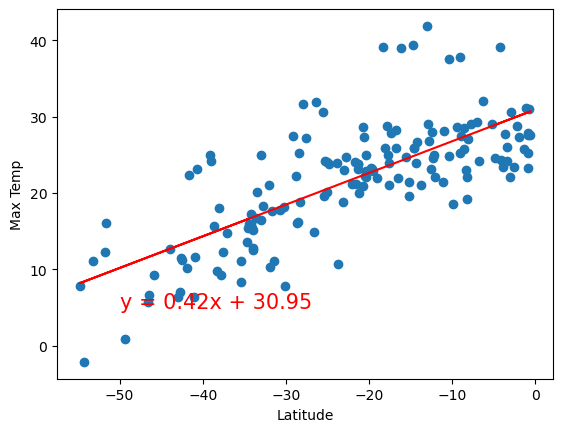

In [40]:
# Linear regression on Southern Hemisphere
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
lin_regress_function(x_values, y_values, (-50, 5))

There looks to be a strong correlation between the city's latitude relative to 0 (the Equator) and the temperature of the city.  The closer you get to the Equator, the hotter the temperature gets, and conversely, the further away you are from the Equator and closer to the Poles, the lower the temperature gets.  This is supported by moderate to strong R-squared values in both hemispheres, showing similar relationships.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.041680221530945805


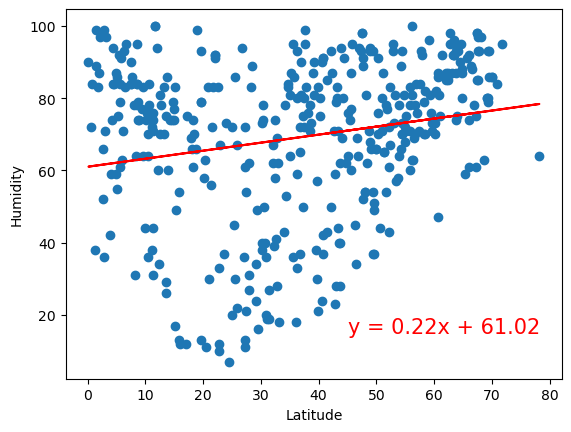

In [41]:
# Linear regression on Northern Hemisphere
plt.ylabel("Humidity")
plt.xlabel("Latitude")
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
lin_regress_function(x_values, y_values, (45,15))

R squared: 0.021577385156733086


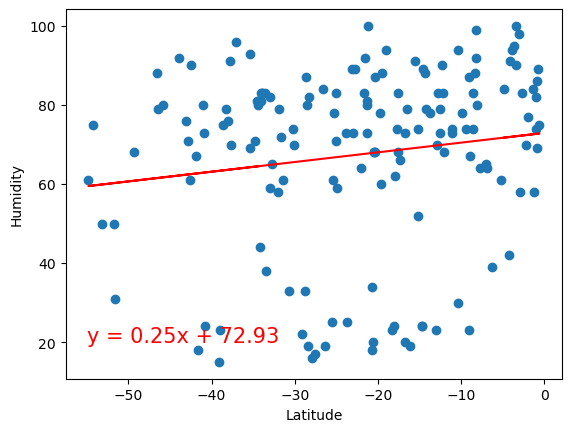

In [42]:
# Southern Hemisphere
plt.ylabel("Humidity")
plt.xlabel("Latitude")
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
lin_regress_function(x_values, y_values, (-55,20))

The plot shows there is very little relationship between humidity and latitude in either hemisphere.  Both hemispheres have very low R-squared values, showing very little correlation or predictability in the relationship.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.02028177436527468


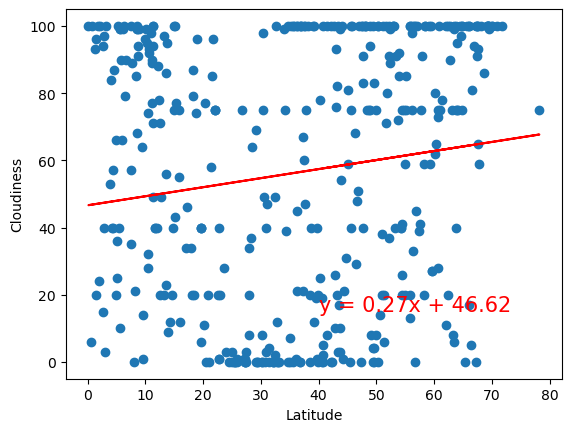

In [43]:
# Linear regression on Northern Hemisphere
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
lin_regress_function(x_values, y_values, (40,15))

R squared: 0.06341311463792537


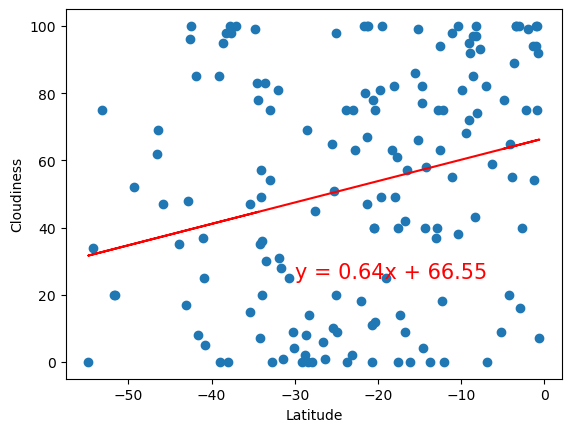

In [44]:
# Linear regression on Southern Hemisphere
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
lin_regress_function(x_values, y_values, (-30,25))

The plot shows there is very little relationship between cloudiness and latitude in either hemisphere.  Both hemispheres have very low R-squared values, showing very little correlation or predictability in the relationship.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.103506364169686


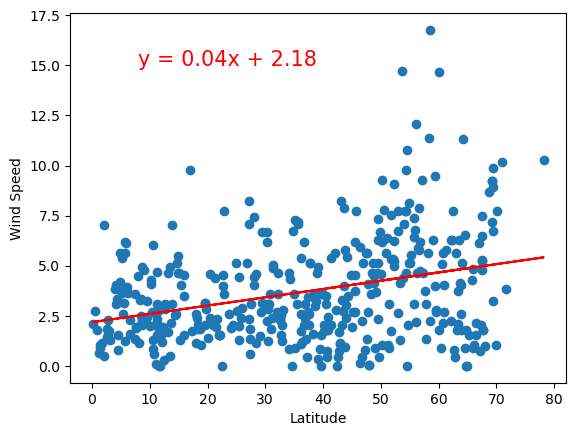

In [45]:
# Northern Hemisphere
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
lin_regress_function(x_values, y_values, (8, 15))

R squared: 0.08506967435801834


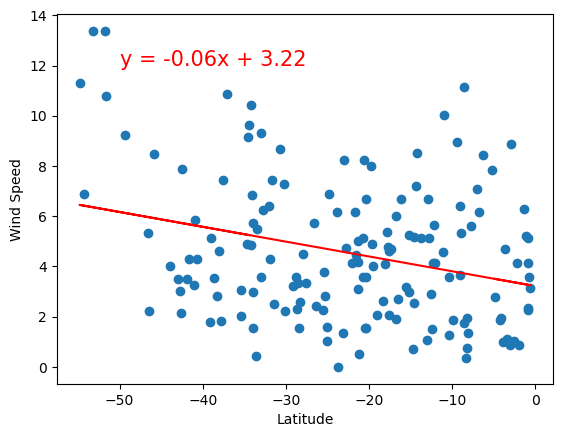

In [46]:
# Southern Hemisphere
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
lin_regress_function(x_values, y_values, (-50, 12))

The plot shows there is very little relationship between wind speed and latitude in either hemisphere.  Both hemispheres have very low R-squared values, showing very little correlation or predictability in the relationship.